In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import gmaps
from api_keys import g_key
from ipywidgets.embed import embed_minimal_html

In [65]:
toronto= pd.read_csv('Toronto/Output/toronto_table.csv')
new_york=pd.read_csv('New York/Output/NY_table.csv')

In [66]:
toronto

,Neighbourhood,Number of Collisions,Median Income,District,Population,City
0,Lawrence Park South,4,151885.0,North York,16828.0,Toronto
1,Kingsway South,1,151552.0,Etobicoke York,9271.0,Toronto
2,Lawrence Park North,2,144963.0,North York,15179.0,Toronto
3,Leaside-Bennington,4,126930.0,Toronto and East York,10084.0,Toronto
4,Forest Hill South,3,119484.0,Toronto and East York,10732.0,Toronto
...,...,...,...,...,...,...
95,Flemingdon Park,7,48917.0,Scarborough,43041.0,Toronto
96,Bay Street Corridor,6,48737.0,Toronto and East York,43466.0,Toronto
97,Weston,2,45696.0,Etobicoke York,29090.0,Toronto
98,Kensington-Chinatown,10,44216.0,Toronto and East York,17945.0,Toronto


In [67]:
new_york

,Neighbourhood,Number of Collisions,Median Income,Population,City
0,BRONX,63,47987.10,1432132,New York
1,BROOKLYN,142,70578.90,2582830,New York
2,MANHATTAN,91,103898.34,1628701,New York
3,QUEENS,148,81883.62,2278906,New York
4,STATEN ISLAND,26,99876.42,476179,New York


In [68]:
montreal = pd.read_csv('montreal/Output/final_montreal.csv')

In [69]:
montreal = montreal.dropna(how='any')
montreal = montreal.drop('Unnamed: 0',axis=1)
montreal

,Districts,Number of Collisions,Median total income of households 2015,Population,City
0,Côte-Saint-Luc,2.0,58935.0,32448.0,Montreal
1,Dollard-Des Ormeaux,2.0,78981.0,48899.0,Montreal
2,Dorval,3.0,64689.0,18980.0,Montreal
3,Hampstead,2.0,122496.0,6973.0,Montreal
4,Kirkland,2.0,115381.0,20151.0,Montreal
5,Mont-Royal,1.0,109540.0,20276.0,Montreal
6,Montréal,155.0,50227.0,1704694.0,Montreal
7,Montréal-Est,2.0,50318.0,3850.0,Montreal
8,Montréal-Ouest,2.0,115029.0,5050.0,Montreal
9,Pointe-Claire,4.0,80242.0,31380.0,Montreal


In [70]:
toronto['Collisions per 1000 people']=(toronto['Number of Collisions']/toronto['Population'])*1000
toronto

,Neighbourhood,Number of Collisions,Median Income,District,Population,City,Collisions per 1000 people
0,Lawrence Park South,4,151885.0,North York,16828.0,Toronto,0.237699
1,Kingsway South,1,151552.0,Etobicoke York,9271.0,Toronto,0.107863
2,Lawrence Park North,2,144963.0,North York,15179.0,Toronto,0.131761
3,Leaside-Bennington,4,126930.0,Toronto and East York,10084.0,Toronto,0.396668
4,Forest Hill South,3,119484.0,Toronto and East York,10732.0,Toronto,0.279538
...,...,...,...,...,...,...,...
95,Flemingdon Park,7,48917.0,Scarborough,43041.0,Toronto,0.162636
96,Bay Street Corridor,6,48737.0,Toronto and East York,43466.0,Toronto,0.138039
97,Weston,2,45696.0,Etobicoke York,29090.0,Toronto,0.068752
98,Kensington-Chinatown,10,44216.0,Toronto and East York,17945.0,Toronto,0.557258


In [71]:
new_york['Collisions per 1000 people']=(new_york['Number of Collisions']/new_york['Population'])*1000
new_york

,Neighbourhood,Number of Collisions,Median Income,Population,City,Collisions per 1000 people
0,BRONX,63,47987.10,1432132,New York,0.043990
1,BROOKLYN,142,70578.90,2582830,New York,0.054978
2,MANHATTAN,91,103898.34,1628701,New York,0.055873
3,QUEENS,148,81883.62,2278906,New York,0.064943
4,STATEN ISLAND,26,99876.42,476179,New York,0.054601


In [72]:
montreal['Collisions per 1000 people']=(montreal['Number of Collisions']/montreal['Population'])*1000
montreal

,Districts,Number of Collisions,Median total income of households 2015,Population,City,Collisions per 1000 people
0,Côte-Saint-Luc,2.0,58935.0,32448.0,Montreal,0.061637
1,Dollard-Des Ormeaux,2.0,78981.0,48899.0,Montreal,0.040901
2,Dorval,3.0,64689.0,18980.0,Montreal,0.158061
3,Hampstead,2.0,122496.0,6973.0,Montreal,0.286821
4,Kirkland,2.0,115381.0,20151.0,Montreal,0.099251
5,Mont-Royal,1.0,109540.0,20276.0,Montreal,0.049319
6,Montréal,155.0,50227.0,1704694.0,Montreal,0.090925
7,Montréal-Est,2.0,50318.0,3850.0,Montreal,0.519481
8,Montréal-Ouest,2.0,115029.0,5050.0,Montreal,0.396040
9,Pointe-Claire,4.0,80242.0,31380.0,Montreal,0.127470


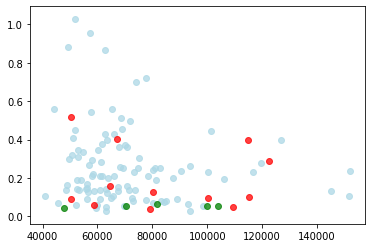

In [76]:
x_axis = toronto['Median Income']
y_axis = toronto['Collisions per 1000 people']
plt.scatter(x_axis,y_axis,c='lightblue',alpha=0.75)
x_axis = new_york['Median Income']
y_axis = new_york['Collisions per 1000 people']
plt.scatter(x_axis,y_axis,c='green',alpha=0.75)
x_axis = montreal['Median total income of households 2015']
y_axis = montreal['Collisions per 1000 people']
plt.scatter(x_axis,y_axis,c='red',alpha=0.75)
plt.show()